#Define library

In [130]:
import numpy as np
import pandas as pd
from sklearn import datasets, model_selection, linear_model , metrics,neighbors,tree,ensemble,preprocessing,svm
import matplotlib.pyplot as plt

#Database setup

##Read CSV file into a DataFrame
We downloaded a database file for Median house prices for California districts derived from the 1990 census ( [Download](https://www.kaggle.com/camnugent/california-housing-prices))
, then uploaded it to the platform, and then read it


In [131]:
data_pd = pd.read_csv("/content/housing.csv")

##Print the database to see the content

In [132]:
data_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
15205,-117.07,33.01,5.0,5870.0,977.0,1917.0,842.0,5.1998,294100.0,<1H OCEAN
15206,-117.06,33.01,9.0,2470.0,417.0,904.0,427.0,4.4219,209200.0,<1H OCEAN
15207,-117.07,33.00,4.0,6242.0,1258.0,2211.0,1116.0,4.2500,281600.0,<1H OCEAN
15208,-117.07,33.00,4.0,9153.0,1866.0,3775.0,1698.0,4.9550,241500.0,<1H OCEAN


##Drop column (`occean_proximity`)

In [133]:
data_pd.drop(['ocean_proximity'],1,inplace=True)

##print the details of the database of table values

In [134]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15210 non-null  float64
 1   latitude            15210 non-null  float64
 2   housing_median_age  15210 non-null  float64
 3   total_rooms         15210 non-null  float64
 4   total_bedrooms      15062 non-null  float64
 5   population          15210 non-null  float64
 6   households          15210 non-null  float64
 7   median_income       15210 non-null  float64
 8   median_house_value  15210 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB


##fill blanks 
we notice that there are a number of missing values in the column (`total_bedrooms`), since the number of missing values is few so we try to complete them, when we observe the column values and compare them with (`total_rooms`) we find that the values of (`total_bedrooms`) are approximately 1/ 5 of the (`total_bedrooms`) values, so we fill in the blanks with 1/5 of the corresponding (`total_bedrooms`) values

In [135]:
data_pd.total_bedrooms.fillna(data_pd.total_rooms/5,inplace=True)
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15210 non-null  float64
 1   latitude            15210 non-null  float64
 2   housing_median_age  15210 non-null  float64
 3   total_rooms         15210 non-null  float64
 4   total_bedrooms      15210 non-null  float64
 5   population          15210 non-null  float64
 6   households          15210 non-null  float64
 7   median_income       15210 non-null  float64
 8   median_house_value  15210 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB


#Do the necessary preprocessing steps
We specified the (`x`) and (`y`), when we observed the values of the table, we found that the values of the column (`longitude`) are very close to each other and there is no significant change in the values, as well as the values of the column (`latitude`) so they will not be used in the process, in order to get better predictions

In [136]:
x= np.array(data_pd.iloc[:,1:8])
y=np.array(data_pd.iloc[:,8])

##Normalizing the data

In [137]:
x_normalizer=preprocessing.StandardScaler()
x_norm=x_normalizer.fit_transform(x)
y_normalizer=preprocessing.StandardScaler()
y_norm=y_normalizer.fit_transform(y.reshape(-1,1))

#Set random seed to 42 for using NumPy

In [138]:
np.random.seed(42)

#Split the dataset into a training/testing
- split size of 10%.
- the random state to 42.

In [139]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_norm,y_norm,test_size=0.10,random_state=42)

#Models

##Linear model

###Create a linear model
- Fit the data and train the models.
- Get predict.

In [140]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
pred =model.predict(x_test)


###Print results
- Print the values (mean squared error) and (r2 score)
- Plot a diagram to show the distribution of the original data with the expected data

The mse is : 0.38257292117359315
The r2  is : 0.6171386137007338


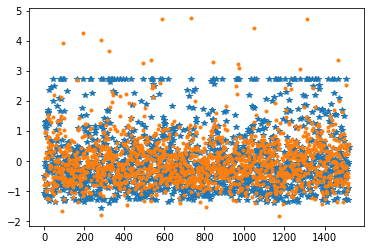

In [141]:
plt.plot(y_test,'*')
plt.plot(pred,'.')
print(f'The mse is : {metrics.mean_squared_error(y_test,pred)}')
print(f'The r2  is : {metrics.r2_score(y_test,pred)}')



---



##Tree model

###Create a tree model
- tuning the (`max_depth`)
- Fit the data and train the models.
- Get predict.

In [142]:
tree_model=tree.DecisionTreeRegressor(max_depth=7,)
tree_model.fit(x_train,y_train)
pred=tree_model.predict(x_test)

###Print results
- Print the values (mean squared error) and (r2 score)
- Plot a diagram to show the distribution of the original data with the expected data

the mse is : 0.39542269896823923
the r2  is : 0.6042791470008849


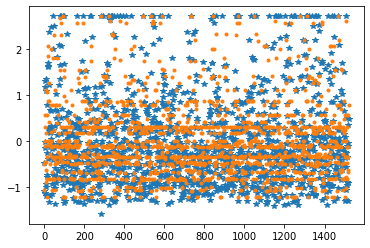

In [143]:
plt.plot(y_test,'*')
plt.plot(pred,'.')
print(f'the mse is : {metrics.mean_squared_error(y_test,pred)}')
print(f'the r2  is : {metrics.r2_score(y_test,pred)}')

##SVM model

###Create a svm model
- tuning the hyper-parameters.
- Fit the data and train the models.
- Get predict.

In [144]:
svm_model=svm.SVR(kernel='rbf',C=30)
svm_model.fit(x_train,y_train)
pred=svm_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###Print results
- Print the values (mean squared error) and (r2 score)
- Plot a diagram to show the distribution of the original data with the expected data

the mse is : 0.24878811258732392
the r2  is : 0.7510242978312094


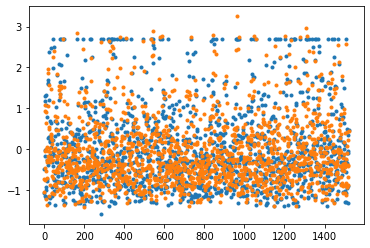

In [145]:
plt.plot(y_test,'.')
plt.plot(pred,'.')
print(f'the mse is : {metrics.mean_squared_error(y_test,pred)}')
print(f'the r2  is : {metrics.r2_score(y_test,pred)}')

#The rsult
After testing the three models. We note that the best results came from the model (ٍSVM). According to the test (mean squared error) and (r2 score), where it was the lowest with (mse : 0.248788) and the highest with (r2 : 0.751024) and according to these measures, it is the best model in predicting compared to the rest of the models tested in this example